In [23]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
def loadfile():
            df= pd.read_csv('/home/neelesh/Downloads/AdmissionDataset/data.csv')
            df=df.drop(['Serial No.'],axis=1)
            X1=df.drop(['Chance of Admit '],axis=1)
            Y1=df[['Chance of Admit ']]

            X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size = 0.2,random_state=1)
            X_train=X_train.reset_index(drop=True)
            Y_train=Y_train.reset_index(drop=True)
            X_test=X_test.reset_index(drop=True)
            Y_test=Y_test.reset_index(drop=True)
            df=pd.concat([X_train,Y_train], axis=1)
            temp_std=list(df.std())
            temp_mean = list(df.mean())
            df = (df - df.mean())*1.0/df.std()
            X = df.iloc[:,0:7]
            ones = np.ones([X.shape[0],1])
            X = np.concatenate((ones,X),axis=1)
            Y= df.iloc[:,7:8].values
            temp1=((X.T).dot(Y))
            temp2=np.linalg.inv((X.T).dot(X))
            theta1=temp2.dot(temp1)
            return df,X_train, X_test, Y_train, Y_test,temp_std,temp_mean,X,Y,theta1


In [24]:
def myfunc(X,theta):
    temp=0
    for i in range(0,len(theta)):
        temp+=(theta[i]*X[i])
    return temp    
def costfunc(theta,X,Y):
    temp=0
    for i in range(0,len(X)):
        temp+=pow(myfunc(X[i],theta)-Y[i],2)
    return temp/(2*len(X))


In [25]:
def gradientDescent(X,Y,theta,iterations,alpha):
    temp=[0]*8
    cost=[0]*iterations
    for i in range(iterations):
        for j in range(len(theta)):
                sum1=0
                for k in range(len(X)):
                    sum1+=(myfunc(X[k],theta)-Y[k])*X[k][j]
                temp[j]=theta[j]-((float(sum1)*alpha)/len(X))
                
        for j in range(len(theta)):
              theta[j]=temp[j]        
        cost[i]=costfunc(theta,X,Y)
    return theta,cost


In [26]:
def execute(X,Y):
        alpha = 0.01
        iterations = 100
        theta = [0]*8
        besttheta,cost=gradientDescent(X,Y,theta,iterations,alpha)
        return besttheta,cost

In [27]:
def predict_one(theta,test_row):
    for i in range(len(test_row)):
        test_row[i]=(test_row[i]-temp_mean[i])/(temp_std[i])
    normalised =  theta[0]*1 +theta[1]*test_row[0] +theta[2]*test_row[1] +theta[3]*test_row[2] +theta[4]*test_row[3] +theta[5]*test_row[4] +theta[6]*test_row[5] +theta[7]*test_row[6] 
    for i in range(len(test_row)):
        test_row[i]=(test_row[i]*(temp_std[i]))+temp_mean[i]
    return (normalised*temp_std[-1])+temp_mean[-1]

R2_score using gradient descent method is: 0.7855176682053696
R2_score using Matrix method is: 0.8008593663156891


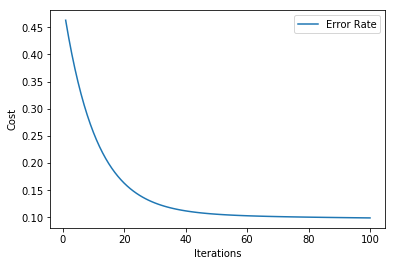

In [28]:
df,X_train, X_test, Y_train, Y_test,temp_std,temp_mean,X,Y,theta1=loadfile()
besttheta,cost=execute(X,Y)
# if(len(sys.argv)>1):
#         Test_Filename=sys.argv[1]
#         testdf =pd.read_csv(Test_Filename)
#         testdf=testdf.drop(['Serial No.'],axis=1)
#         X_test=testdf.drop(['Chance of Admit '],axis=1)
#         Y_test=testdf[['Chance of Admit ']]  
myY1=[]
myY2=[]
test=[]
Y_test1=np.array(Y_test)
X_test1=np.array(X_test)
for i in range(0,len(Y_test1)):
     test.append(Y_test1[i][0])
test=np.array(test)        
for i in range(len(X_test1)):
    myY1.append(predict_one(besttheta,X_test1[i]))
    myY2.append(predict_one(theta1,X_test1[i]))

print "R2_score using gradient descent method is:",r2_score(test,myY1)
print "R2_score using Matrix method is:",r2_score(test,myY2)
nodes=[i for i in range(1,101)]
plt.plot(nodes,cost, label = 'Error Rate') 
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()